In [1]:
import pandas as pd
from matplotlib import pyplot as plt

import numpy as np
import sklearn.linear_model as skl
from sklearn.metrics import r2_score

from scipy import stats as st

In [4]:
totale = pd.read_csv("/home/francesco/Codici/Computazionale/dc0/HadCRUT.5.0.1.0.analysis.summary_series.global.annual.csv" , header = 0 )
totale.describe()


,Time,Anomaly (deg C),Lower confidence limit (2.5%),Upper confidence limit (97.5%)
count,173.000000,173.000000,173.000000,173.000000
mean,1936.000000,-0.078973,-0.176930,0.018984
std,50.084928,0.369607,0.408487,0.334411
min,1850.000000,-0.597561,-0.728832,-0.466290
25%,1893.000000,-0.341332,-0.486397,-0.210125
50%,1936.000000,-0.176805,-0.263519,-0.074705
75%,1979.000000,0.077631,0.013469,0.193821
max,2022.000000,0.932927,0.901764,0.964091


In [20]:
def KS(anno) : 
    mask_pre = totale[totale.iloc[:,0] > anno].index
    maske_post = totale[totale.iloc[:,0] < anno].index

    pre = totale.drop(mask_pre)
    post = totale.drop(maske_post)

    return st.ks_2samp(pre.iloc[:,1] , post.iloc[:,1])[1]

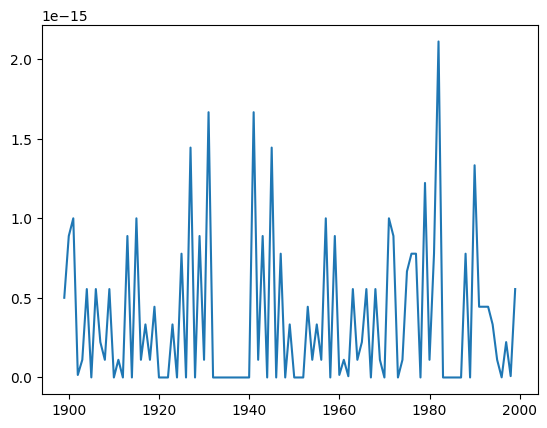

In [31]:
p = np.array(KS(totale['Time'].min() + 49))
anni = np.array(totale['Time'].min() + 49)
for i in range(100) :
    anno =  totale['Time'].min() + 50 + i
    p = np.append(p , KS(anno) )
    anni = np.append(anni , anno)

plt.plot(anni , p)